# Explore U19 data Pipeline

Here we introduce some useful DataJoint tools to explore the U19 pipeline

First thing first, import datajoint

In [2]:
import datajoint as dj

# 1. Browse schemas you have access to - `dj.list_schemas()`

In [4]:
dj.list_schemas()

['U19_acquisition',
 'U19_action',
 'U19_imaging',
 'U19_lab',
 'U19_reference',
 'U19_subject',
 'U19_task',
 'U19_test',
 'shans_tutorial',
 'test']


## Major schemas:   

Meta data: `U19_lab`, `U19_subject`, `U19_action`, `U19_task`  
Behavior: `U19_acquisition` (also contains some imaging info)  
Imaging: `U19_imaging`

These schemas have been generated by matlab or python, but as a user, you don't have to get the code to generate these tables. To work with these tables, the simplest thing you would do is to reconstruct a module that represents this schema with the method `create_virtual_module`.

In [5]:
lab = dj.create_virtual_module('lab', 'U19_lab') # the first argument here is the __name__ of the virtual module
task = dj.create_virtual_module('task', 'U19_task') 
subject = dj.create_virtual_module('subject', 'U19_subject')
action = dj.create_virtual_module('action', 'U19_action')
acquisition = dj.create_virtual_module('acquisition', 'U19_acquisition')
imaging = dj.create_virtual_module('imaging', 'U19_imaging')

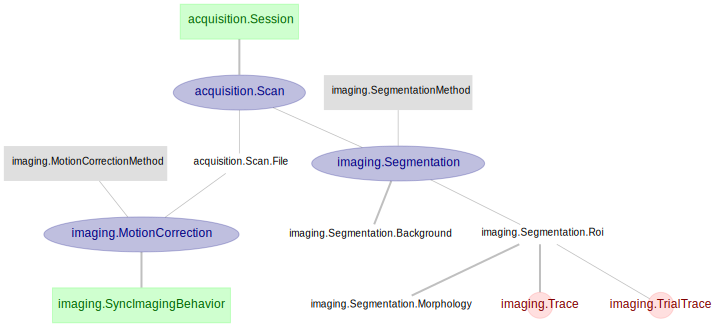

In [61]:
dj.Diagram(imaging) + acquisition.Session + acquisition.Scan + acquisition.Scan.File

Now this is as if you have the code that generated the schema and tables, and have just imported them!

In [62]:
imaging.MotionCorrectionMethod()

mcorr_method
cv.motionCorrect
cv.nonlinearMotionCorrect


In [66]:
imaging.MotionCorrection.describe();

-> acquisition.Scan.File
-> imaging.MotionCorrectionMethod
---
x_shifts             : longblob                     # nFrames x 2, meta file, frameMCorr-xShifts
y_shifts             : longblob                     # nFrames x 2, meta file, frameMCorr-yShifts
reference_image      : longblob                     # 512 x 512, meta file, frameMCorr-reference
motion_corrected_average_image : longblob                     # 512 x 512, meta file, activity
mcorr_metric=null    : varchar(64)                  # frameMCorr-metric-name



In [71]:
imaging.SyncImagingBehavior()

user_id username,subject_id nickname,session_date date of experiment,session_number number,file_number file number of a given scan,mcorr_method,"frame_behavior_idx register the sample number of behavior recording to each frame. 1 x nFrames, metadata-imaging-iteration","frame_block_idx register block number for each frame, metadata-imaging-block","frame_trial_idx register trial number for each frame, metadata-imaging-trial"
edward,E39,2017-10-11,0,1,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,2,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,3,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,4,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,5,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,6,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,7,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,8,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,9,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=
edward,E39,2017-10-11,0,10,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=


In [76]:
acquisition.TowersBlock().Trial()

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right","trial_time time series of this trial, start from zero for each trial",trial_abs_start absolute start time of the trial realtive to the beginning of the session,collision boolean vector indicating whether the subject hit the maze on each time point,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start
ben,B205,2018-06-27,0,1,1,L,L,=BLOB=,1.75375,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.8106,-0.0625503,1239,0,0,0,1239,1320,=BLOB=,=BLOB=,=BLOB=,1,0.5,2
ben,B205,2018-06-27,0,1,2,L,L,=BLOB=,16.5643,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.0874,-0.0724976,973,0,0,0,973,1033,=BLOB=,=BLOB=,=BLOB=,2,0.5,1683
ben,B205,2018-06-27,0,1,3,R,R,=BLOB=,28.6517,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.2617,-0.0711059,989,0,0,0,989,1056,=BLOB=,=BLOB=,=BLOB=,-7,0.5,3076
ben,B205,2018-06-27,0,1,4,R,R,=BLOB=,40.9134,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.104,-0.0677373,910,0,0,0,910,1037,=BLOB=,=BLOB=,=BLOB=,-1,0.5,4491
ben,B205,2018-06-27,0,1,5,L,L,=BLOB=,53.0174,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.635,-0.0746578,811,0,0,0,811,860,=BLOB=,=BLOB=,=BLOB=,3,0.5,5888
ben,B205,2018-06-27,0,1,6,L,L,=BLOB=,63.6524,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.7417,-0.0739294,813,0,0,0,813,872,=BLOB=,=BLOB=,=BLOB=,9,0.5,7108
ben,B205,2018-06-27,0,1,7,R,R,=BLOB=,74.3941,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.6879,-0.0720446,792,0,0,0,792,869,=BLOB=,=BLOB=,=BLOB=,9,0.5,8340
ben,B205,2018-06-27,0,1,8,R,R,=BLOB=,85.082,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.573,-0.0679937,969,0,0,0,969,1091,=BLOB=,=BLOB=,=BLOB=,4,0.5,9568
ben,B205,2018-06-27,0,1,9,R,R,=BLOB=,97.655,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.6749,-0.0719122,880,0,0,0,880,983,=BLOB=,=BLOB=,=BLOB=,5,0.5,11019
ben,B205,2018-06-27,0,1,10,L,L,=BLOB=,109.33,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.2363,-0.0739983,766,0,0,0,766,811,=BLOB=,=BLOB=,=BLOB=,5,0.5,12362


In [97]:
import datetime
key = {
  'user_id': 'edward',
  'subject_id': 'E39',
  'session_date': datetime.date(2017, 10, 11),
  'session_number': 0,
  'file_number': 1,
  'mcorr_method': 'cv.nonlinearMotionCorrect'}

In [99]:
image_sync = imaging.SyncImagingBehavior() & key
image_sync

user_id username,subject_id nickname,session_date date of experiment,session_number number,file_number file number of a given scan,mcorr_method,"frame_behavior_idx register the sample number of behavior recording to each frame. 1 x nFrames, metadata-imaging-iteration","frame_block_idx register block number for each frame, metadata-imaging-block","frame_trial_idx register trial number for each frame, metadata-imaging-trial"
edward,E39,2017-10-11,0,1,cv.nonlinearMotionCorrect,=BLOB=,=BLOB=,=BLOB=


In [101]:
frame_behavior_idx = image_sync.fetch1('frame_behavior_idx')
frame_behavior_idx

array([  0,   0,   0, ..., 887, 890, 893], dtype=uint16)

In [92]:
keys[1]

('edward', 'E39', datetime.date(2017, 10, 12), 0, 1, 'cv.nonlinearMotionCorrect', array([  0,   0,   0, ..., 619, 622, 625], dtype=uint16), array([0, 0, 0, ..., 1, 1, 1], dtype=uint8), array([0, 0, 0, ..., 5, 5, 5], dtype=uint8))

In [85]:
acquisition.TowersBlock.Trial & keys[0]

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right","trial_time time series of this trial, start from zero for each trial",trial_abs_start absolute start time of the trial realtive to the beginning of the session,collision boolean vector indicating whether the subject hit the maze on each time point,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start
edward,E39,2017-10-11,0,1,1,R,R,=BLOB=,0.800009,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.4418,-0.0741684,538,0,0,0,538,567,=BLOB=,=BLOB=,=BLOB=,41,0.5,2
edward,E39,2017-10-11,0,1,2,R,R,=BLOB=,11.2418,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.2096,-0.0697142,523,0,0,0,523,570,=BLOB=,=BLOB=,=BLOB=,1,0.5,827
edward,E39,2017-10-11,0,1,3,L,L,=BLOB=,21.4514,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.3053,-0.0721088,623,0,0,0,623,666,=BLOB=,=BLOB=,=BLOB=,2,0.5,1655
edward,E39,2017-10-11,0,1,4,L,L,=BLOB=,32.7567,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.1511,-0.0751236,534,0,0,0,534,569,=BLOB=,=BLOB=,=BLOB=,-9,0.5,2579
edward,E39,2017-10-11,0,1,5,L,L,=BLOB=,42.9078,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.2123,-0.0756346,606,0,0,0,606,659,=BLOB=,=BLOB=,=BLOB=,-4,0.5,3406
edward,E39,2017-10-11,0,1,6,L,L,=BLOB=,54.1201,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.2466,-0.0755035,596,0,0,0,596,660,=BLOB=,=BLOB=,=BLOB=,3,0.5,4322
edward,E39,2017-10-11,0,1,7,L,L,=BLOB=,65.3667,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.8826,-0.0759244,596,0,0,0,596,630,=BLOB=,=BLOB=,=BLOB=,-7,0.5,5240
edward,E39,2017-10-11,0,1,8,R,R,=BLOB=,76.2493,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,11.8692,-0.0746471,675,0,0,0,675,714,=BLOB=,=BLOB=,=BLOB=,4,0.5,6128
edward,E39,2017-10-11,0,1,9,R,L,=BLOB=,88.1185,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,18.7903,-0.0753131,581,0,0,0,581,643,=BLOB=,=BLOB=,=BLOB=,5,0.5,7100
edward,E39,2017-10-11,0,1,10,R,R,=BLOB=,106.909,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,10.7633,-0.0751186,583,0,0,0,583,620,=BLOB=,=BLOB=,=BLOB=,6,0.5,8683


In [6]:
subject.Subject()

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


In [7]:
subject.schema.save('subject.py')

# 2. Browse tables in a schema - `dj.Diagram`

**Table tiers**:  
Manual table: green box  
Lookup table: gray box  
Imported table: blue oval  
Computed table: red circle  
Part table: plain text

**Dependencies**:  
One-to-one primary: thick solid line  
One-to-many primary: thin solid line  
Secondary foreign key reference: dashed line
Renamed secondary foreign key references: orange dot

## Show tables in the whole schema

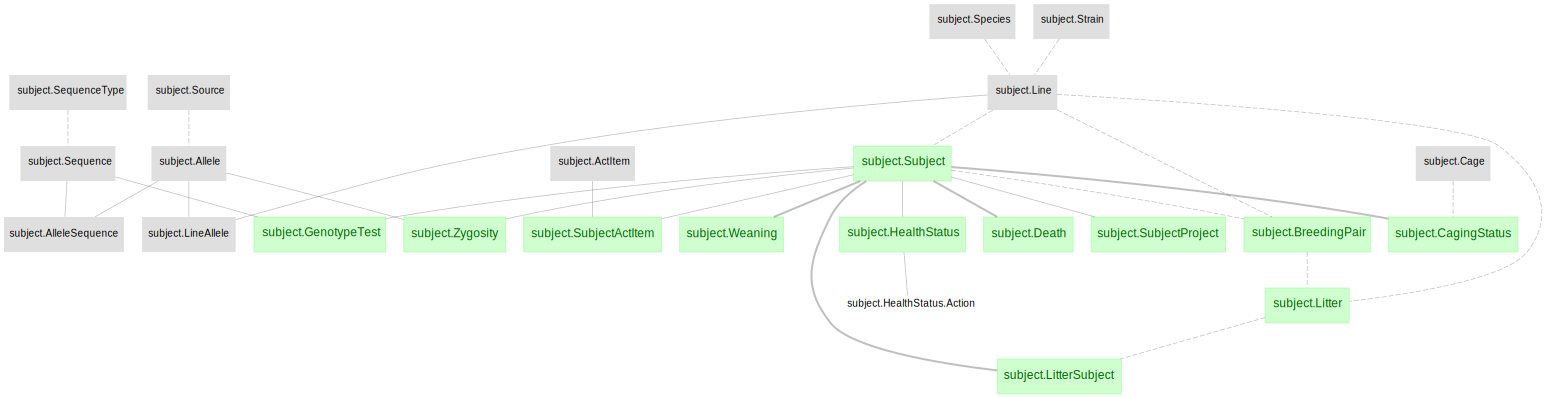

In [8]:
dj.Diagram(subject)

## Show diagram of arbitruary parts of the database

A combination of arbitruary tables:

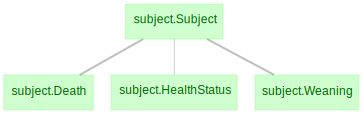

In [9]:
dj.Diagram(subject.Subject) + dj.Diagram(subject.Death) + dj.Diagram(subject.HealthStatus) + dj.Diagram(subject.Weaning)

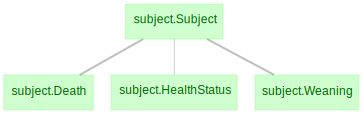

In [10]:
# same as above
dj.Diagram(subject.Subject) + subject.Death + subject.HealthStatus + subject.Weaning

The tables could be from different schemas:

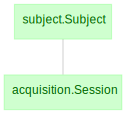

In [11]:
dj.Diagram(subject.Subject) + acquisition.Session

# 3. Getting the detailed definition of a table - `table.describe()`

In [12]:
subject.Subject.describe();

-> lab.User
subject_id           : char(8)                      # nickname
---
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> lab.Location
-> [nullable] lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



# 4. Browsing of data - queries

Query all subjects

In [21]:
subject.Subject()

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


## Restriction  `&`: filtering data

### Restriction: Query one subject

In [14]:
# restrict by string
subject.Subject & 'subject_id="B205"'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0


In [15]:
# restrict by dictionary
subject.Subject & {'subject_id': 'B205'}

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0


In [16]:
subject.Subject & {'sex': 'Male'}

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


`OR` logic: a list of dictionaries

In [22]:
subject.Subject & [{'user_id': 'ben'}, {'user_id': 'edward'}]

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


### Restriction: Query subjects born after a date

In [17]:
subject.Subject & 'dob > "2019-01-01"'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lucas,SP2,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,22.4
lucas,SP3,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,21.6
lucas,SP4,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,24.7
lucas,SP5,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.3
lucas,SP6,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,28.1
lucas,SP7,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,23.6
lucas,SP8,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,27.4
mioffe,M10_604,None,Female,2019-02-10,=BLOB=,vivarium,1910,Thy1-GP5.3,,24.1
mioffe,M5_696,None,Female,2019-01-21,=BLOB=,vivarium,1910,Unknown,,15.0
testuser,T01,None,Female,2019-01-23,=BLOB=,vivarium,1910,Thy1-GP5.3,,26.0


### Restriction: subjects within a range of dates

In [18]:
subject.Subject & 'dob between "2019-01-01" and "2019-04-01"'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lucas,SP2,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,22.4
lucas,SP3,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,21.6
lucas,SP4,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,24.7
lucas,SP5,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.3
lucas,SP6,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,28.1
lucas,SP7,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,23.6
lucas,SP8,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,27.4
mioffe,M10_604,None,Female,2019-02-10,=BLOB=,vivarium,1910,Thy1-GP5.3,,24.1
mioffe,M5_696,None,Female,2019-01-21,=BLOB=,vivarium,1910,Unknown,,15.0
testuser,T01,None,Female,2019-01-23,=BLOB=,vivarium,1910,Thy1-GP5.3,,26.0


### Restriction: Query subjects on multiple attributes

In [19]:
subject.Subject & 'dob > "2019-01-01"' & 'sex="Male"'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lucas,SP6,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,28.1
lucas,SP7,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,23.6
lucas,SP8,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,27.4
testuser,T02,None,Male,2019-01-25,=BLOB=,vivarium,1910,C57BL6/J,,20.0
testuser,T05,None,Male,2019-01-23,=BLOB=,vivarium,1910,C57BL6/J,,18.0
testuser,T06,None,Male,2019-01-23,=BLOB=,vivarium,1910,DAT-Ai148,,25.0
testuser,T07,None,Male,2019-01-23,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,19.0
testuser,T08,None,Male,2019-01-23,=BLOB=,vivarium,1910,D2-CRE,,19.0
testuser,T09,None,Male,2019-01-23,=BLOB=,vivarium,1910,DAT-IRES-CRE,,24.0
testuser,T10,None,Male,2019-01-23,=BLOB=,vivarium,1910,C57BL6/J,,22.0


### Restriction: Query subjects restricted by other tables

In [23]:
# subjects that are dead
subject.Subject & subject.Death

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0
edward,E54,None,Male,None,=BLOB=,valhalla,1910,Ai93-Emx1,,27.0
edward,E61,None,Female,2017-07-27,=BLOB=,vivarium,1910,Thy1-GP5.3,,22.5
edward,E68,None,Female,2018-01-18,=BLOB=,vivarium,1910,Thy1-GP5.3,,22.2
edward,E69,None,Female,2018-01-18,=BLOB=,vivarium,1910,Thy1-GP5.3,,21.4
edward,E80,None,Male,None,=BLOB=,valhalla,1910,C57BL6/J,,41.9
lucas,ai10,None,Male,2017-11-08,=BLOB=,vivarium,1910,Ai93-Emx1,,29.8
lucas,ai11,None,Male,2017-11-08,=BLOB=,vivarium,1910,Ai93-Emx1,,28.5
lucas,ai12,None,Male,2017-11-06,=BLOB=,vivarium,1910,Ai93-Emx1,,32.7


In [24]:
# subjects that are alive
subject.Subject - subject.Death

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E38,None,Male,None,=BLOB=,vivarium,1910,Unknown,,26.0
edward,E39,None,Male,None,=BLOB=,vivarium,1910,Unknown,,26.0


## Join `*`:  gather information from different tables

In [25]:
subject.Subject * action.WaterAdministration

user_id username,subject_id nickname,administration_date date time,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight,earned water administered,supplement,received,watertype_name
ben,B205,2018-06-20,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-21,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-23,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-24,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-25,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-27,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-28,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,1.0,0.0,1.0,Unknown
ben,B205,2018-06-29,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-06-30,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
ben,B205,2018-07-01,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown


Behavior of join:  
1. match the common field(s) of the primary keys in the two tables
2. do a combination of the non-matched part of the primary key
3. listing out the secondary attributes for each combination
4. if two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename that attribute for at least one of the tables.

For example,

In [26]:
subject.Subject * acquisition.Session

DataJointError: Cannot join query expressions on dependent attribute `location`

We can resolve this issue by `proj()`

## Projection `.proj()`: focus on attributes of interest

In [27]:
subject.Subject.proj()

user_id username,subject_id nickname
ben,B205
ben,B208
ben,B3151
ben,B4486
ben,B4487
ben,B4488
ben,B4489
edward,E18
edward,E26
edward,E36


In [28]:
subject.Subject.proj('dob', 'sex')

user_id username,subject_id nickname,sex sex,dob birth date
ben,B205,Male,None
ben,B208,Male,None
ben,B3151,Male,None
ben,B4486,Male,None
ben,B4487,Male,None
ben,B4488,Male,None
ben,B4489,Male,None
edward,E18,Male,None
edward,E26,Male,None
edward,E36,Male,None


### rename attribute with ***proj()***

In [29]:
subject.Subject.proj('sex', birth_date='dob')

user_id username,subject_id nickname,sex sex,birth_date birth date
ben,B205,Male,None
ben,B208,Male,None
ben,B3151,Male,None
ben,B4486,Male,None
ben,B4487,Male,None
ben,B4488,Male,None
ben,B4489,Male,None
edward,E18,Male,None
edward,E26,Male,None
edward,E36,Male,None


### perform simple computations with ***proj***

**Example 1: Get date of a weighing activity:**

In [30]:
weighing_with_date = action.Weighing.proj(weighing_date='date(weighing_time)') # more options, check MySQL syntax

In [31]:
weighing_with_date

user_id username,subject_id nickname,weighing_time,weighing_date calculated attribute
ben,B205,2018-06-20 12:52:00,2018-06-20
ben,B205,2018-06-21 16:53:00,2018-06-21
ben,B205,2018-06-23 04:39:00,2018-06-23
ben,B205,2018-06-24 21:22:00,2018-06-24
ben,B205,2018-06-25 15:15:00,2018-06-25
ben,B205,2018-06-27 11:55:00,2018-06-27
ben,B205,2018-06-28 12:44:00,2018-06-28
ben,B205,2018-06-29 21:44:00,2018-06-29
ben,B205,2018-07-03 14:19:00,2018-07-03
ben,B208,2018-06-20 12:48:00,2018-06-20


**Example 2: Age of the animal when performing each session?**

In [32]:
# First get the date of birth and the session date into the same query
q = subject.Subject * acquisition.Session

DataJointError: Cannot join query expressions on dependent attribute `location`

This error happened because location is a secondary attribute in both tables! To avoid the problem, we either ignore that attribute in at least one of the two tables, or rename it. Like this:

In [33]:
q = subject.Subject * acquisition.Session.proj()
q

user_id username,subject_id nickname,session_date date of experiment,session_number number,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,2018-06-27,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-06-28,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-03,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-04,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-05,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-06,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-07,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-11,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-12,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B205,2018-07-13,0,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0


In [35]:
# Then compute the age
q_with_age = q.proj('dob', age='datediff(session_date, dob)') & 'dob is not NULL'
q_with_age

user_id username,subject_id nickname,session_date date of experiment,session_number number,dob birth date,age calculated attribute
edward,E58,2017-10-17,0,2016-11-14,337
edward,E58,2017-10-18,0,2016-11-14,338
edward,E58,2017-10-19,0,2016-11-14,339
edward,E58,2017-10-20,0,2016-11-14,340
edward,E58,2017-10-23,0,2016-11-14,343
edward,E58,2017-10-24,0,2016-11-14,344
edward,E58,2017-10-25,0,2016-11-14,345
edward,E58,2017-10-26,0,2016-11-14,346
edward,E58,2017-10-27,0,2016-11-14,347
edward,E58,2017-10-31,0,2016-11-14,351


## Aggregation `.aggr()`: simple computation of one table against another table

Example: how many sessions does each subject do so far?

In [37]:
subject.Subject.aggr(acquisition.Session.proj(), n='count(*)')

user_id username,subject_id nickname,n calculated attribute
ben,B205,41
ben,B208,40
ben,B3151,40
ben,B4486,39
ben,B4487,40
ben,B4488,39
ben,B4489,41
edward,E18,7
edward,E26,43
edward,E36,26


# 5. Fetching data

## Fetch all fields: `fetch()`

In [38]:
# fetch all data from a table
subjs = subject.Subject.fetch()
subjs

array([('ben', 'B205', None, 'Male', None, None, 'vivarium', '1910', 'DAT-IRES-CRE', '', 27. ),
       ('ben', 'B208', None, 'Male', None, None, 'vivarium', '1910', 'DAT-IRES-CRE', '', 27. ),
       ('ben', 'B3151', None, 'Male', None, None, 'vivarium', '1910', 'DAT-IRES-CRE', '', 27. ),
       ('ben', 'B4486', None, 'Male', None, None, 'vivarium', '1910', 'DAT-IRES-CRE', '', 27. ),
       ('ben', 'B4487', None, 'Male', None, None, 'vivarium', '1910', 'DAT-IRES-CRE', '', 27. ),
       ('ben', 'B4488', None, 'Male', None, None, 'vivarium', '1910', 'Unknown', '', 27. ),
       ('ben', 'B4489', None, 'Male', None, None, 'vivarium', '1910', 'Unknown', '', 27. ),
       ('edward', 'E18', None, 'Male', None, None, 'valhalla', '1910', 'Unknown', '', 26. ),
       ('edward', 'E26', None, 'Male', None, None, 'vivarium', '1910', 'Unknown', '', 24. ),
       ('edward', 'E36', None, 'Male', None, None, 'vivarium', '1910', 'Unknown', '', 23. ),
       ('edward', 'E38', None, 'Male', None, None, 'vi

In [39]:
subjs['subject_id']

array(['B205', 'B208', 'B3151', 'B4486', 'B4487', 'B4488', 'B4489', 'E18',
       'E26', 'E36', 'E38', 'E39', 'E42', 'E43', 'E44', 'E45', 'E47',
       'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56',
       'E57', 'E58', 'E59', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66',
       'E67', 'E68', 'E69', 'E70', 'E71', 'E74', 'E75', 'E76', 'E77',
       'E78', 'E79', 'E80', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87',
       'E88', 'J131', 'J132', 'J133', 'ai10', 'ai11', 'ai12', 'ai13',
       'ai7', 'ai8', 'ai9', 'GP1', 'GP2', 'GP3', 'GP4', 'GP5', 'GP6',
       'SL1', 'SL2', 'SL3', 'SL4', 'SL5', 'SL6', 'SL7', 'SP1', 'SP2',
       'SP3', 'SP4', 'SP5', 'SP6', 'SP7', 'SP8', 'vg1', 'vg12', 'vg15',
       'vg16', 'vg17', 'vg18', 'vg20', 'vg21', 'vg22', 'vg23', 'vg24',
       'vg25', 'vg26', 'vg27', 'vg28', 'vg29', 'vg3', 'vg30', 'vg31',
       'vg32', 'vg33', 'vg34', 'vg36', 'vg37', 'vg38', 'VG39', 'VG40',
       'VG41', 'VG42', 'VG43', 'VG44', 'VG45', 'VG46', 'VG47', 'M10',
       'M10

In [40]:
subjs['dob']

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, datetime.date(2016, 11, 14), None,
       datetime.date(2017, 7, 27), datetime.date(2017, 7, 27),
       datetime.date(2017, 4, 2), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 27), datetime.date(2017, 6, 15),
       datetime.date(2017, 11, 20), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 18), datetime.date(2017, 11, 20),
       datetime.date(2017, 11, 20), datetime.date(2017, 12, 13),
       datetime.date(2017, 12, 13), datetime.date(2018, 3, 25),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 8),
       datetime.date(2017, 5, 3), None, datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 24), datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 8), datetime.date(1999, 1, 1),
       datetime.date(1999, 1, 1), datetime.date(1999, 1, 1), None, None,
     

In [41]:
# fetch as a list of dictionaries
subjs_dict = subject.Subject.fetch(as_dict=True)
subjs_dict

[{'user_id': 'ben',
  'subject_id': 'B205',
  'genomics_id': None,
  'sex': 'Male',
  'dob': None,
  'head_plate_mark': None,
  'location': 'vivarium',
  'protocol': '1910',
  'line': 'DAT-IRES-CRE',
  'subject_description': '',
  'initial_weight': 27.0},
 {'user_id': 'ben',
  'subject_id': 'B208',
  'genomics_id': None,
  'sex': 'Male',
  'dob': None,
  'head_plate_mark': None,
  'location': 'vivarium',
  'protocol': '1910',
  'line': 'DAT-IRES-CRE',
  'subject_description': '',
  'initial_weight': 27.0},
 {'user_id': 'ben',
  'subject_id': 'B3151',
  'genomics_id': None,
  'sex': 'Male',
  'dob': None,
  'head_plate_mark': None,
  'location': 'vivarium',
  'protocol': '1910',
  'line': 'DAT-IRES-CRE',
  'subject_description': '',
  'initial_weight': 27.0},
 {'user_id': 'ben',
  'subject_id': 'B4486',
  'genomics_id': None,
  'sex': 'Male',
  'dob': None,
  'head_plate_mark': None,
  'location': 'vivarium',
  'protocol': '1910',
  'line': 'DAT-IRES-CRE',
  'subject_description': '',
 

In [42]:
# fetch as pandas dataframe
subjs_df = subject.Subject.fetch(format='frame')
subjs_df

genomics_id     sex         dob  \
user_id  subject_id                                   
ben      B205              None    Male        None   
         B208              None    Male        None   
         B3151             None    Male        None   
         B4486             None    Male        None   
         B4487             None    Male        None   
         B4488             None    Male        None   
         B4489             None    Male        None   
edward   E18               None    Male        None   
         E26               None    Male        None   
         E36               None    Male        None   
         E38               None    Male        None   
         E39               None    Male        None   
         E42               None    Male        None   
         E43               None  Female        None   
         E44               None  Female        None   
         E45               None    Male        None   
         E47               None    Male        None   
         E48               None    Male        None   
         E49               None    Male        None   
         E50               None  Female        None   
         E51               None  Female        None   
         E52               None    Male        None   
         E53               None    Male        None   
         E54               None    Male        None   
         E55               None    Male        None   
         E56               None    Male        None   
         E57               None    Male        None   
         E58               None    Male  2016-11-14   
         E59               None    Male        None   
         E61               None  Female  2017-07-27   
...                         ...     ...         ...   
sakoay   K61               None  Female        None   
         K62               None    Male        None   
         K63               None    Male        None   
         K64               None    Male        None   
         K65               None    Male        None   
         K66               None    Male        None   
         K67               None    Male        None   
         K68               None    Male        None   
         kp1               None  Female        None   
         KP2               None  Female        None   
         KP3               None  Female        None   
testuser T01               None  Female  2019-01-23   
         T02               None    Male  2019-01-25   
         T05               None    Male  2019-01-23   
         T06               None    Male  2019-01-23   
         T07               None    Male  2019-01-23   
         T08               None    Male  2019-01-23   
         T09               None    Male  2019-01-23   
         T10               None    Male  2019-01-23   
         T12               None    Male  2019-02-10   
         T13               None    Male        None   
         T14               None    Male  2019-01-23   
         T15               None    Male        None   
         T16               None    Male  1994-03-29   
         T17               None    Male  2017-05-05   
         T18               None    Male  2019-01-23   
         T19               None    Male  2018-03-03   
         T20               None    Male  2019-01-23   
zhihao   zz24              None    Male        None   
         zz25              None    Male        None   

                                                       head_plate_mark  \
user_id  subject_id                                                      
ben      B205                                                     None   
         B208                                                     None   
         B3151                                                    None   
         B4486                                                    None   
         B4487                                                    None   
         B4488                      

In [43]:
# fetch the primary key
pk = subject.Subject.fetch('KEY')
pk

[{'user_id': 'ben', 'subject_id': 'B205'},
 {'user_id': 'ben', 'subject_id': 'B208'},
 {'user_id': 'ben', 'subject_id': 'B3151'},
 {'user_id': 'ben', 'subject_id': 'B4486'},
 {'user_id': 'ben', 'subject_id': 'B4487'},
 {'user_id': 'ben', 'subject_id': 'B4488'},
 {'user_id': 'ben', 'subject_id': 'B4489'},
 {'user_id': 'edward', 'subject_id': 'E18'},
 {'user_id': 'edward', 'subject_id': 'E26'},
 {'user_id': 'edward', 'subject_id': 'E36'},
 {'user_id': 'edward', 'subject_id': 'E38'},
 {'user_id': 'edward', 'subject_id': 'E39'},
 {'user_id': 'edward', 'subject_id': 'E42'},
 {'user_id': 'edward', 'subject_id': 'E43'},
 {'user_id': 'edward', 'subject_id': 'E44'},
 {'user_id': 'edward', 'subject_id': 'E45'},
 {'user_id': 'edward', 'subject_id': 'E47'},
 {'user_id': 'edward', 'subject_id': 'E48'},
 {'user_id': 'edward', 'subject_id': 'E49'},
 {'user_id': 'edward', 'subject_id': 'E50'},
 {'user_id': 'edward', 'subject_id': 'E51'},
 {'user_id': 'edward', 'subject_id': 'E52'},
 {'user_id': 'edwar

In [44]:
# fetch specific attributes
dob, sex = subject.Subject.fetch('dob', 'sex')

In [45]:
dob

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, datetime.date(2016, 11, 14), None,
       datetime.date(2017, 7, 27), datetime.date(2017, 7, 27),
       datetime.date(2017, 4, 2), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 27), datetime.date(2017, 6, 15),
       datetime.date(2017, 11, 20), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 18), datetime.date(2017, 11, 20),
       datetime.date(2017, 11, 20), datetime.date(2017, 12, 13),
       datetime.date(2017, 12, 13), datetime.date(2018, 3, 25),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 8),
       datetime.date(2017, 5, 3), None, datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 24), datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 8), datetime.date(1999, 1, 1),
       datetime.date(1999, 1, 1), datetime.date(1999, 1, 1), None, None,
     

In [46]:
# fetch specific attributes as a list of dictionary
info = subject.Subject.fetch('dob', 'sex', as_dict=True)
info

[{'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': datetime.date(2016, 11, 14)},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': datetime.date(2017, 7, 27)},
 {'sex': 'Femal

## fetch data only from one entry: `fetch1`

In [49]:
B205 = (subject.Subject & {'subject_id': 'B205'}).fetch1()  # "fetch1()" because we know there's only one

In [50]:
B205

{'user_id': 'ben',
 'subject_id': 'B205',
 'genomics_id': None,
 'sex': 'Male',
 'dob': None,
 'head_plate_mark': None,
 'location': 'vivarium',
 'protocol': '1910',
 'line': 'DAT-IRES-CRE',
 'subject_description': '',
 'initial_weight': 27.0}

In [51]:
B205_key = (subject.Subject & {'subject_id': 'B205'}).fetch1('KEY')

In [52]:
B205_key

{'user_id': 'ben', 'subject_id': 'B205'}

In [57]:
B205_init_weight = (subject.Subject & {'subject_id': 'B205'}).fetch1('initial_weight')

In [56]:
B205_init_weight

array([27.])